# Projeto de Inteligência Artificial para Previsão de Vendas <h1>
## Machine Learning - Supervised + Data Analytics <h2>

* O desafio é prever as vendas com base nos gastos com marketing nos 3 principais produtos: TV, Jornal e Rádio,
* A unidade de medida do gasto com marketing em TV, Jornal e Rádio está em milhares de reais,
* Já a unidade de Vendas está em milhões de reais.
* Para isso serão utilizadas as ferramentas de Regressão Linear e Árvore de Decisão.


In [1]:
# Instalando bibliotecas que serão utilizadas neste projeto:
#!pip install matplotlib
#!pip install seaborn
#!pip install scikit.learn

      TV  Radio  Jornal  Vendas
0  230.1   37.8    69.2    22.1
1   44.5   39.3    45.1    10.4
2   17.2   45.9    69.3    12.0
3  151.5   41.3    58.5    16.5
4  180.8   10.8    58.4    17.9
5    8.7   48.9    75.0     7.2
6   57.5   32.8    23.5    11.8
7  120.2   19.6    11.6    13.2
8    8.6    2.1     1.0     4.8
9  199.8    2.6    21.2    15.6
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Radio   200 non-null    float64
 2   Jornal  200 non-null    float64
 3   Vendas  200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
None


<function matplotlib.pyplot.show(close=None, block=None)>

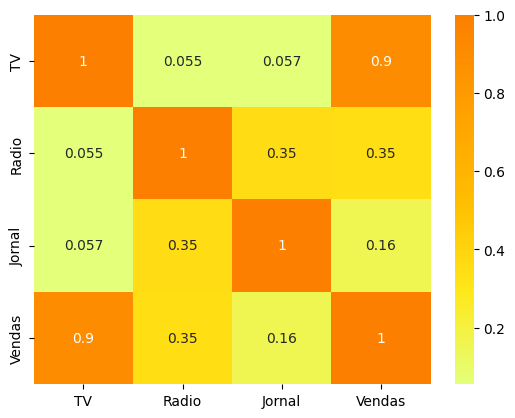

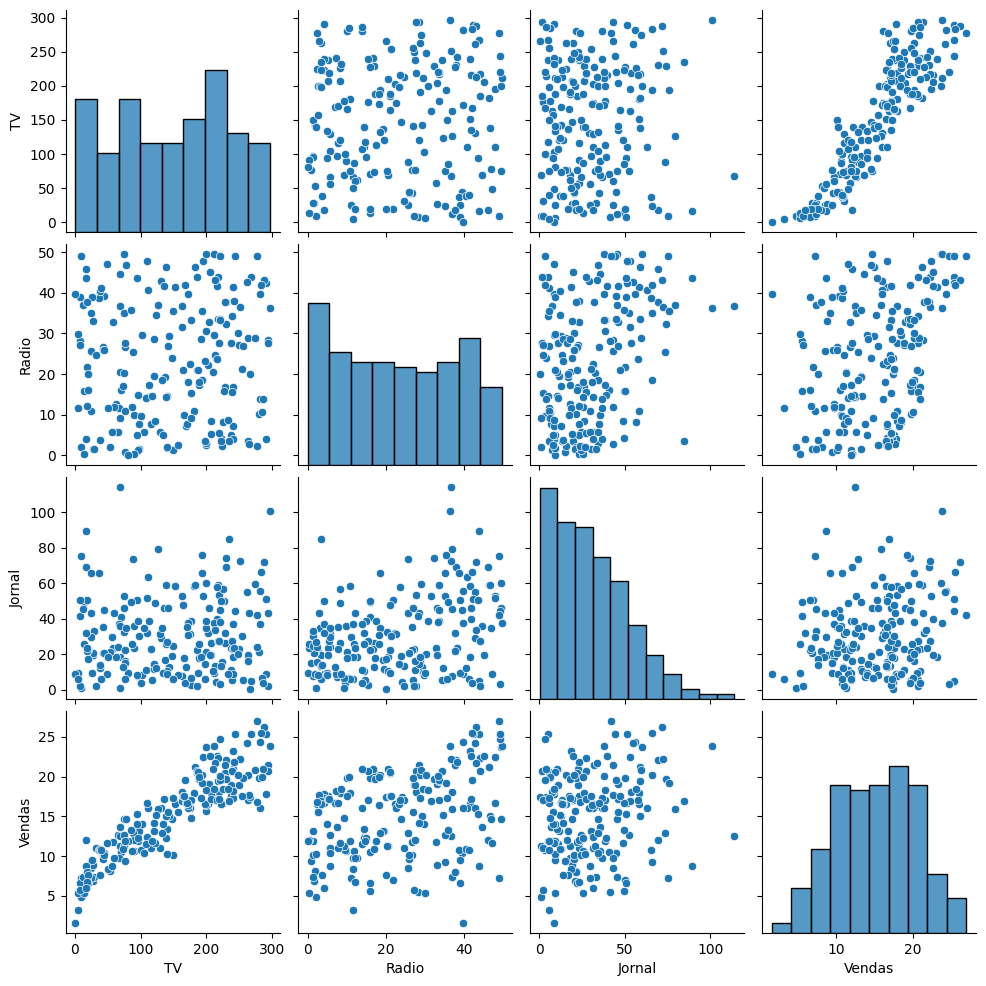

In [2]:
# Importando a base de dados e analisando os dados:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

tabela = pd.read_csv("advertising.csv")
print(tabela.head(10)) # verificando as 10 primeiras linhas 
print(tabela.info()) # verificando o tipo das variáveis entre outras informações

#Análise Exploratória
#print(f"Matriz Correlação \n {tabela.corr()}")
sns.heatmap(tabela.corr(), cmap="Wistia", annot= True)
sns.pairplot(tabela)
plt.show



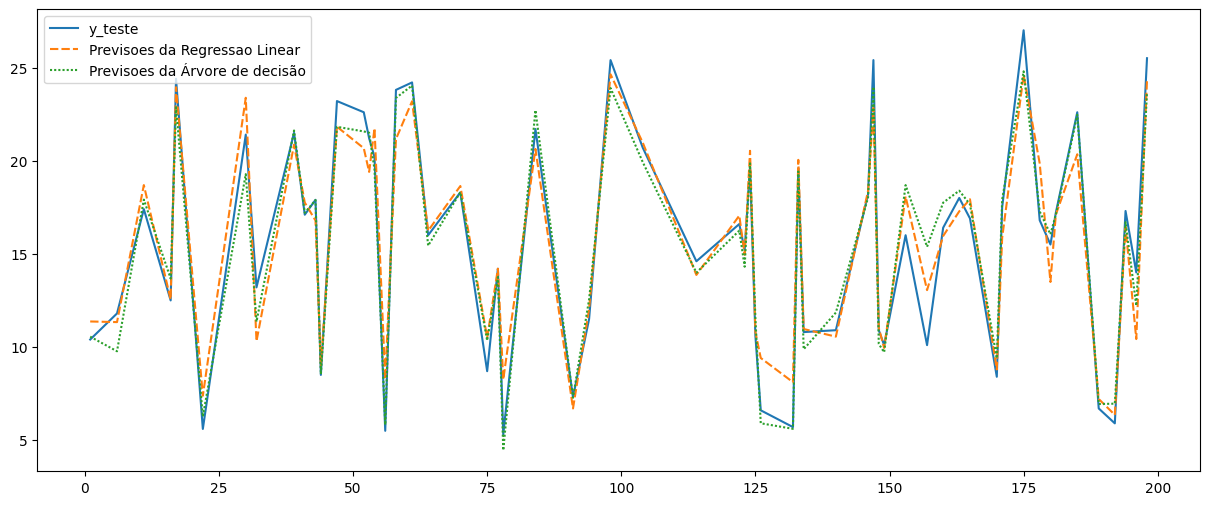

Comparando os modelos de Machine Learning, a metrica R2 Score da Regressão Linear foi de 93.46% e Arvore de decisão foi de 95.90%


In [3]:
# Usando agora a inteligencia artificial com o metodos de machine learning
# Vamos escolher o melhor modelo para prever o comportamento de novos dados:

y = tabela["Vendas"]
x = tabela[["TV", "Radio" ,"Jornal"]]
# O x poderia ser escrito apenas excluindo a coluna de Vendas: x = tabela.drop("Vendas", axis=1)

from sklearn.model_selection import train_test_split

x_treino, x_teste, y_treino, y_teste = train_test_split(x,y, test_size=0.3)

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# cria as inteligencias aritificiais
modelo_regressaolinear = LinearRegression()
modelo_arvoredecisao = RandomForestRegressor()

# Treinamento da inteligencia artificial
modelo_regressaolinear.fit(x_treino, y_treino)
modelo_arvoredecisao.fit(x_treino, y_treino)

# Testando a IA 
testando_regressaolinear = modelo_regressaolinear.predict(x_teste)
testando_arvoredecisao = modelo_arvoredecisao.predict(x_teste)

#Visualizando a previsão:
resultado = pd.DataFrame()
resultado["y_teste"] = y_teste
resultado["Previsoes da Regressao Linear"] = testando_regressaolinear
resultado["Previsoes da Árvore de decisão"] = testando_arvoredecisao
#print(resultado)

plt.figure(figsize=(15,6))
sns.lineplot(data=resultado)
plt.show()


#Avaliando as IA
from sklearn.metrics import r2_score
r2_regressaolinear = r2_score(y_teste,testando_regressaolinear)
r2_arvoredecisao = r2_score(y_teste,testando_arvoredecisao)
print(f"Comparando os modelos de Machine Learning, a metrica R2 Score da Regressão Linear foi de {r2_regressaolinear:.2%} e Arvore de decisão foi de {r2_arvoredecisao:.2%}")


In [4]:
# Prevendo um resultado de vendas novo em uma tabela só com dados de entrada:
nova_tabelax = pd.read_csv("prever_novos.csv")
print(nova_tabelax)
previsao_vendas = modelo_arvoredecisao.predict(nova_tabelax)
print(f'vendas: {previsao_vendas}')

      TV  Radio  Jornal
0   23.1    3.8    69.2
1   44.5    0.0     5.1
2  170.2   45.9     0.0
vendas: [ 7.449  8.656 20.756]


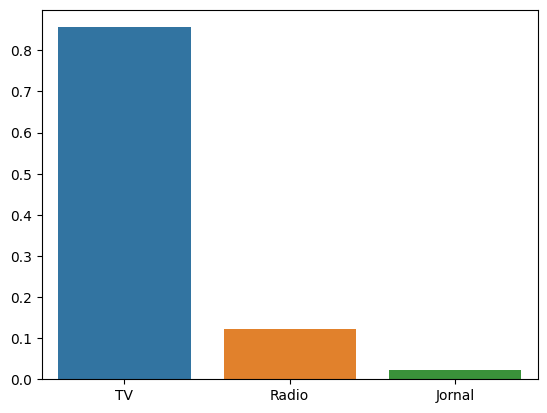

In [5]:
# Analisando a importancia de cada variavel para com as vendas
sns.barplot(x=x_treino.columns, y=modelo_arvoredecisao.feature_importances_)
plt.show()



<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=121c8cd0-9827-4682-8930-90cbc46c8af5' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>